In [40]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from itertools import cycle

In [41]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

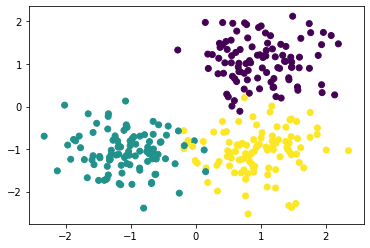

In [42]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [43]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Number estimado de clusters: %s"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measuer: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la Silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        class_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col + '.')
        plt.plot(class_center[0], class_center[1], 'o', markerfacecolor=col, markeredgecolor="k", markersize=14)
        for x in X[class_members]:
            plt.plot([class_center[0], x[0]], [class_center[1], x[1]], col, alpha=0.2)
            
    plt.title("Numero estimado de cluster: %d"%n_clust)
    plt.show()

Number estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measuer: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada: 0.871
Coeficiente de la Silueta: 0.735


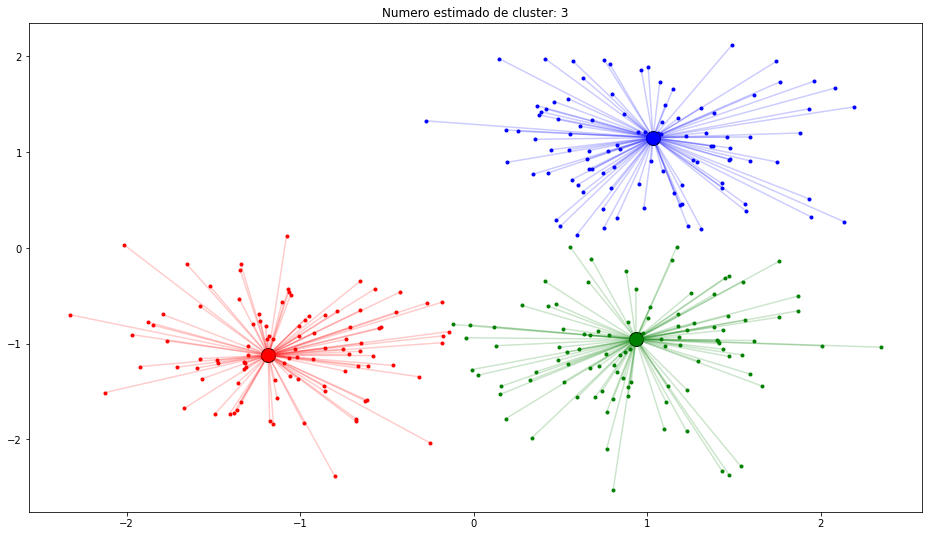

In [44]:
report_affinity_propagation(X)